# 1. Kết nối tới drive , import một số thư viện cần thiết

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

from keras.models import Sequential
from keras.layers import Dense, GRU

In [3]:
VIC = pd.read_csv("/content/drive/MyDrive/DAB Final Project/Source Code/Dataset/VIC.csv")

In [4]:
VIC

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,61653,61570,62314,60992,1.17M,0.13%
1,12/4/2017,62893,62066,63802,61570,2.08M,2.01%
2,12/5/2017,60331,63636,64876,58512,4.46M,-4.07%
3,12/6/2017,60331,60826,60826,57769,3.24M,0.00%
4,12/7/2017,59504,59917,60992,58678,1.22M,-1.37%
...,...,...,...,...,...,...,...
1371,6/5/2023,52100,52100,52500,52000,1.82M,0.19%
1372,6/6/2023,53200,52200,53200,52200,2.12M,2.11%
1373,6/7/2023,52800,53300,53600,52600,1.66M,-0.75%
1374,6/8/2023,52400,52800,53000,52400,1.44M,-0.76%


In [5]:
VIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1376 non-null   object
 1   Price     1376 non-null   int64 
 2   Open      1376 non-null   int64 
 3   High      1376 non-null   int64 
 4   Low       1376 non-null   int64 
 5   Vol.      1376 non-null   object
 6   Change %  1376 non-null   object
dtypes: int64(4), object(3)
memory usage: 75.4+ KB


# 2. Tiền xử lý dữ liệu

### Loại bỏ một số dữ liệu trống trong dataset

In [6]:
# Drop missing values
VIC = VIC.dropna()

In [7]:
VIC1 = VIC.reset_index()['Price']

In [8]:
VIC['Index'] = np.arange(len(VIC.index))

<h1> 3.Scale dữ liệu

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
VIC1=scaler.fit_transform(np.array(VIC1).reshape(-1,1))

# 4. Chia tập dữ liệu để train-test-validate theo tỉ lệ 7:2:1

In [10]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(VIC1))
test_size = int(0.2 * len(VIC1))
val_size = len(VIC1) - train_size - test_size

In [11]:
train_data = VIC1[:train_size]
test_data = VIC1[train_size:train_size+test_size]
val_data = VIC1[train_size+test_size:]

<h1>Hàm Create Dataset

In [12]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [15]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#Model fitting
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 3s 60ms/step - loss: 0.1101 - val_loss: 0.0503
Epoch 2/100
14/14 [==============================] - 0s 33ms/step - loss: 0.0164 - val_loss: 0.0160
Epoch 3/100
14/14 [==============================] - 0s 35ms/step - loss: 0.0057 - val_loss: 0.0163
Epoch 4/100
14/14 [==============================] - 0s 34ms/step - loss: 0.0033 - val_loss: 0.0201
Epoch 5/100
14/14 [==============================] - 0s 34ms/step - loss: 0.0029 - val_loss: 0.0141
Epoch 6/100
14/14 [==============================] - 0s 33ms/step - loss: 0.0026 - val_loss: 0.0145
Epoch 7/100
14/14 [==============================] - 0s 34ms/step - loss: 0.0023 - val_loss: 0.0114
Epoch 8/100
14/14 [==============================] - 0s 34ms/step - loss: 0.0021 - val_loss: 0.0109
Epoch 9/100
14/14 [==============================] - 0s 34ms/step - loss: 0.0019 - val_loss: 0.0083
Epoch 10/100
14/14 [==============================] - 0s 33ms/step - loss: 0.0017 - val_loss: 0.0075

<h1>Dự báo dữ liệu test, val

In [17]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 6ms/step


<h1>Chuẩn hóa dữ liệu

In [18]:
#Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [19]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[79100.],
       [79000.],
       [78300.],
       [78300.],
       [78100.],
       [78400.],
       [78800.],
       [81000.],
       [82200.],
       [81400.],
       [81000.],
       [81000.],
       [80500.],
       [80800.],
       [81100.],
       [81200.],
       [82100.],
       [82700.],
       [82300.],
       [80500.],
       [79500.],
       [81700.],
       [81300.],
       [82200.],
       [81700.],
       [80700.],
       [79500.],
       [78800.],
       [79300.],
       [77500.],
       [77700.],
       [76200.],
       [78000.],
       [78000.],
       [77900.],
       [80000.],
       [79700.],
       [80000.],
       [79800.],
       [79100.],
       [80400.],
       [80500.],
       [79000.],
       [78000.],
       [77000.],
       [78000.],
       [78000.],
       [77900.],
       [77800.],
       [77400.],
       [77600.],
       [77700.],
       [77700.],
       [78000.],
       [78500.],
       [78800.],
       [79300.],
       [78900.],
       [78800.

In [20]:
yval = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([[52900.],
       [52900.],
       [52800.],
       [52600.],
       [52600.],
       [52700.],
       [52600.],
       [52500.],
       [51900.],
       [50500.],
       [52100.],
       [51300.],
       [50700.],
       [50900.],
       [50600.],
       [50600.],
       [50500.],
       [51700.],
       [54400.],
       [52900.],
       [53200.],
       [53200.],
       [52500.],
       [52100.],
       [52600.],
       [52600.],
       [52600.],
       [52000.],
       [52700.],
       [52400.],
       [52000.],
       [52000.],
       [52000.],
       [52100.],
       [53200.],
       [52800.],
       [52400.]])

<h1>Đánh giá độ chính xác của thuật toán

In [21]:
# RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 1432.9858730766161
Testing RMSE: 1532.9771644972648


In [22]:
#MAE
valid_mae = mean_absolute_error(yval,y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 1339.857263513514
Testing MAE: 1197.872306034482


In [23]:
#MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))*100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 2.572297209530523
Testing MAPE: 1.8067235310882903


<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [24]:
x_input=val_data[37:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.05935484 0.05806452 0.05806452 0.05548387 0.06064516 0.08
 0.08903226 0.11225806 0.09290323 0.08516129 0.06064516 0.0683871
 0.07096774 0.07096774 0.05806452 0.05032258 0.04774194 0.04516129
 0.03741935 0.03096774 0.03096774 0.03741935 0.03870968 0.04645161
 0.04903226 0.03225806 0.03225806 0.03096774 0.02580645 0.02709677
 0.0283871  0.02967742 0.0283871  0.02709677 0.0283871  0.03225806
 0.03225806 0.03354839 0.03612903 0.03225806 0.04516129 0.03612903
 0.03483871 0.02967742 0.02967742 0.02967742 0.02967742 0.03612903
 0.03612903 0.03741935 0.03870968 0.04129032 0.05806452 0.09677419
 0.08129032 0.06451613 0.0516129  0.05032258 0.04258065 0.04
 0.03354839 0.03225806 0.03096774 0.03096774 0.02967742 0.02709677
 0.02709677 0.0283871  0.02709677 0.02580645 0.01806452 0.
 0.02064516 0.01032258 0.00258065 0.00516129 0.00129032 0.00129032
 0.         0.01548387 0.05032258 0.03096774 0.03483871 0.03483871
 0.02580645 0.02064516 0.02709677 0.02709677 0.02709677 0.01935484
 0.0

In [25]:
print(scaler.inverse_transform(lst_output))

[[53616.79794453]
 [54240.11619017]
 [54867.59532429]
 [55491.09430239]
 [56110.20575464]
 [56725.24697334]
 [57336.35076508]
 [57943.52925569]
 [58546.75646126]
 [59146.01390436]
 [59741.28599465]
 [60332.57677406]
 [60919.9006781 ]
 [61503.28657776]
 [62082.76565373]
 [62658.37948024]
 [63230.17540574]
 [63798.20424318]
 [64362.51680553]
 [64923.16621542]
 [65480.21021485]
 [66033.70192647]
 [66583.70486647]
 [67130.27562201]
 [67673.46616089]
 [68213.342309  ]
 [68749.94795024]
 [69283.35122019]
 [69813.60177696]
 [70340.75158834]]


<h1>Vẽ hình mô tả dự đoán

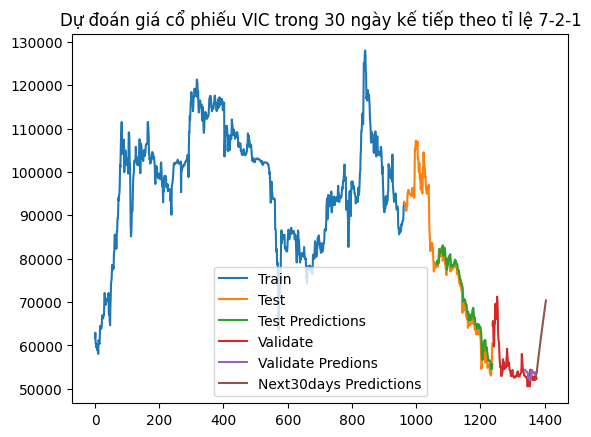

In [26]:
#Drawing plot
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(VIC1)-1, stop=len(VIC1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Test Predictions','Validate','Validate Predions','Next30days Predictions'])
plt.title("Dự đoán giá cổ phiếu VIC trong 30 ngày kế tiếp theo tỉ lệ 7-2-1")
plt.show()

# 5. Chia tập dữ liệu để train-test-validate theo tỉ lệ 6:3:1

In [27]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(VIC1))
test_size = int(0.3 * len(VIC1))
val_size = len(VIC1) - train_size - test_size

In [28]:
train_data = VIC1[:train_size]
test_data = VIC1[train_size:train_size+test_size]
val_data = VIC1[train_size+test_size:]

<h1>Hàm Create Dataset

In [29]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [32]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
#Model fitting
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 92ms/step - loss: 0.2289 - val_loss: 0.0119
Epoch 2/100
12/12 [==============================] - 1s 58ms/step - loss: 0.0160 - val_loss: 0.0450
Epoch 3/100
12/12 [==============================] - 1s 58ms/step - loss: 0.0101 - val_loss: 0.0121
Epoch 4/100
12/12 [==============================] - 1s 46ms/step - loss: 0.0052 - val_loss: 0.0105
Epoch 5/100
12/12 [==============================] - 0s 36ms/step - loss: 0.0038 - val_loss: 0.0147
Epoch 6/100
12/12 [==============================] - 0s 37ms/step - loss: 0.0034 - val_loss: 0.0128
Epoch 7/100
12/12 [==============================] - 0s 39ms/step - loss: 0.0031 - val_loss: 0.0107
Epoch 8/100
12/12 [==============================] - 0s 37ms/step - loss: 0.0029 - val_loss: 0.0108
Epoch 9/100
12/12 [==============================] - 0s 36ms/step - loss: 0.0027 - val_loss: 0.0099
Epoch 10/100
12/12 [==============================] - 0s 37ms/step - loss: 0.0025 - val_loss: 0.0088

<h1>Dự báo dữ liệu test, val

In [34]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 8ms/step


<h1>Chuẩn hóa dữ liệu

In [35]:
#Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [36]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[ 97900.],
       [104000.],
       [ 97700.],
       [ 96200.],
       [ 95400.],
       [ 94600.],
       [ 93100.],
       [ 94800.],
       [ 94100.],
       [ 94100.],
       [ 94100.],
       [ 95000.],
       [ 93900.],
       [ 92000.],
       [ 91300.],
       [ 91300.],
       [ 92000.],
       [ 92000.],
       [ 91400.],
       [ 87800.],
       [ 86800.],
       [ 86700.],
       [ 85600.],
       [ 86100.],
       [ 87100.],
       [ 87000.],
       [ 86100.],
       [ 86500.],
       [ 86700.],
       [ 88000.],
       [ 87700.],
       [ 87800.],
       [ 88600.],
       [ 88600.],
       [ 88800.],
       [ 89300.],
       [ 91900.],
       [ 92900.],
       [ 93100.],
       [ 92500.],
       [ 92600.],
       [ 92600.],
       [ 92400.],
       [ 92300.],
       [ 91000.],
       [ 91800.],
       [ 92100.],
       [ 92200.],
       [ 95000.],
       [ 95000.],
       [ 95800.],
       [ 95800.],
       [ 95800.],
       [ 95300.],
       [ 95000.],
       [ 9

In [37]:
yval = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([[53000.],
       [52900.],
       [52900.],
       [52800.],
       [52600.],
       [52600.],
       [52700.],
       [52600.],
       [52500.],
       [51900.],
       [50500.],
       [52100.],
       [51300.],
       [50700.],
       [50900.],
       [50600.],
       [50600.],
       [50500.],
       [51700.],
       [54400.],
       [52900.],
       [53200.],
       [53200.],
       [52500.],
       [52100.],
       [52600.],
       [52600.],
       [52600.],
       [52000.],
       [52700.],
       [52400.],
       [52000.],
       [52000.],
       [52000.],
       [52100.],
       [53200.],
       [52800.],
       [52400.]])

<h1>Đánh giá độ chính xác của thuật toán

In [38]:
# RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 1825.2732495733103
Testing RMSE: 1764.9002019797822


In [39]:
#MAE
valid_mae = mean_absolute_error(yval,y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 1757.3484786184217
Testing MAE: 1268.0360229099676


In [40]:
#MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))*100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 3.3728914901605704
Testing MAPE: 1.6673122754571754


<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [41]:
x_input=val_data[39:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.0460481]
101
1 day input [0.05806452 0.05806452 0.05548387 0.06064516 0.08       0.08903226
 0.11225806 0.09290323 0.08516129 0.06064516 0.0683871  0.07096774
 0.07096774 0.05806452 0.05032258 0.04774194 0.04516129 0.03741935
 0.03096774 0.03096774 0.03741935 0.03870968 0.04645161 0.04903226
 0.03225806 0.03225806 0.03096774 0.02580645 0.02709677 0.0283871
 0.02967742 0.0283871  0.02709677 0.0283871  0.03225806 0.03225806
 0.03354839 0.03612903 0.03225806 0.04516129 0.03612903 0.03483871
 0.02967742 0.02967742 0.02967742 0.02967742 0.03612903 0.03612903
 0.03741935 0.03870968 0.04129032 0.05806452 0.09677419 0.08129032
 0.06451613 0.0516129  0.05032258 0.04258065 0.04       0.03354839
 0.03225806 0.03096774 0.03096774 0.02967742 0.02709677 0.02709677
 0.0283871  0.02709677 0.02580645 0.01806452 0.         0.02064516
 0.01032258 0.00258065 0.00516129 0.00129032 0.00129032 0.
 0.01548387 0.05032258 0.03096774 0.03483871 0.03483871 0.02580645
 0.02064516 0.02709677 0.02709677 0.0270967

In [42]:
print(scaler.inverse_transform(lst_output))

[[54068.72811913]
 [54791.3848348 ]
 [55543.05517301]
 [56293.89229417]
 [57034.39648449]
 [57760.70769131]
 [58471.17160633]
 [59165.18771276]
 [59842.69133955]
 [60503.89959663]
 [61149.16528761]
 [61778.91454846]
 [62393.60700548]
 [62993.71036887]
 [63579.70389724]
 [64152.03451365]
 [64711.15953475]
 [65257.50740618]
 [65791.49387032]
 [66313.52543086]
 [66823.98780435]
 [67323.25284928]
 [67811.67394668]
 [68289.5963937 ]
 [68757.35509396]
 [69215.26878327]
 [69663.64002973]
 [70102.76216269]
 [70532.92158246]
 [70954.38736677]]


<h1>Vẽ hình mô tả dự đoán

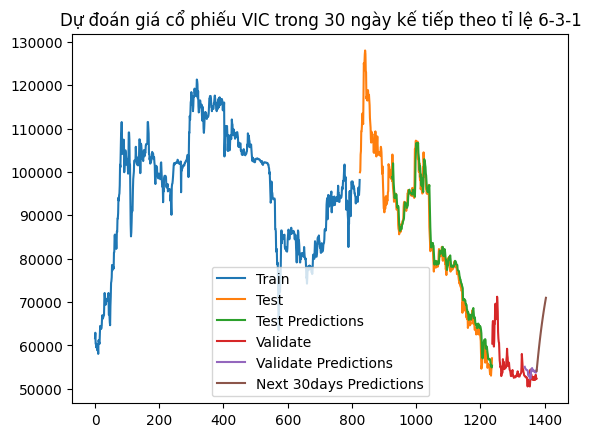

In [43]:
#Drawing plot
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(VIC1)-1, stop=len(VIC1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Test Predictions','Validate','Validate Predictions','Next 30days Predictions'])
plt.title("Dự đoán giá cổ phiếu VIC trong 30 ngày kế tiếp theo tỉ lệ 6-3-1")
plt.show()

# 6. Chia tập dữ liệu để train-test-validate theo tỉ lệ 5:3:2

In [44]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(VIC1))
test_size = int(0.3 * len(VIC1))
val_size = len(VIC1) - train_size - test_size

In [45]:
train_data = VIC1[:train_size]
test_data = VIC1[train_size:train_size+test_size]
val_data = VIC1[train_size+test_size:]

<h1>Hàm Create Dataset

In [46]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [47]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [48]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [49]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
#Model fitting
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 2s 69ms/step - loss: 0.1781 - val_loss: 0.0077
Epoch 2/100
10/10 [==============================] - 0s 39ms/step - loss: 0.0160 - val_loss: 0.0254
Epoch 3/100
10/10 [==============================] - 0s 37ms/step - loss: 0.0089 - val_loss: 0.0036
Epoch 4/100
10/10 [==============================] - 0s 39ms/step - loss: 0.0064 - val_loss: 0.0038
Epoch 5/100
10/10 [==============================] - 0s 39ms/step - loss: 0.0035 - val_loss: 0.0045
Epoch 6/100
10/10 [==============================] - 0s 36ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 7/100
10/10 [==============================] - 0s 38ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 8/100
10/10 [==============================] - 0s 39ms/step - loss: 0.0026 - val_loss: 0.0029
Epoch 9/100
10/10 [==============================] - 0s 37ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 10/100
10/10 [==============================] - 0s 37ms/step - loss: 0.0022 - val_loss: 0.0023

<h1>Dự báo dữ liệu test, val

In [51]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

6/6 [==============================] - 0s 7ms/step


<h1>Chuẩn hóa dữ liệu

In [52]:
#Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [53]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[ 88889.],
       [ 82667.],
       [ 88356.],
       [ 88000.],
       [ 94133.],
       [ 95556.],
       [ 93333.],
       [ 95556.],
       [ 89778.],
       [ 94400.],
       [ 96000.],
       [ 97778.],
       [ 96889.],
       [ 97511.],
       [ 97778.],
       [ 96178.],
       [ 96800.],
       [ 96889.],
       [ 96444.],
       [ 96178.],
       [ 95022.],
       [ 95022.],
       [ 94489.],
       [ 94222.],
       [ 92711.],
       [ 94222.],
       [ 94133.],
       [ 94133.],
       [ 94222.],
       [ 93689.],
       [ 93067.],
       [ 94756.],
       [ 96356.],
       [ 95378.],
       [ 94667.],
       [ 95911.],
       [ 98133.],
       [ 99911.],
       [100267.],
       [104000.],
       [104800.],
       [109333.],
       [109333.],
       [110489.],
       [112889.],
       [113511.],
       [111467.],
       [111022.],
       [117333.],
       [125067.],
       [124444.],
       [125244.],
       [127111.],
       [128000.],
       [127200.],
       [12

In [54]:
yval = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([[62000.],
       [61000.],
       [57500.],
       [54600.],
       [55000.],
       [55500.],
       [57000.],
       [60000.],
       [60100.],
       [60200.],
       [60200.],
       [60000.],
       [60000.],
       [60400.],
       [59700.],
       [56000.],
       [58400.],
       [58500.],
       [58600.],
       [56800.],
       [56500.],
       [56100.],
       [54800.],
       [55000.],
       [55700.],
       [55400.],
       [55400.],
       [55400.],
       [55100.],
       [54300.],
       [53400.],
       [53300.],
       [53700.],
       [53000.],
       [54300.],
       [55000.],
       [57000.],
       [60400.],
       [64600.],
       [65600.],
       [64000.],
       [61000.],
       [59700.],
       [61000.],
       [65000.],
       [65000.],
       [69400.],
       [69600.],
       [66000.],
       [68800.],
       [68100.],
       [66600.],
       [71200.],
       [69900.],
       [67800.],
       [63100.],
       [61600.],
       [60800.],
       [60600.

<h1>Đánh giá độ chính xác của thuật toán

In [55]:
# RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 2065.7434623213962
Testing RMSE: 2070.084103514247


In [56]:
#MAE
valid_mae = mean_absolute_error(yval,y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 1737.3327008928577
Testing MAE: 1422.337947146302


In [57]:
#MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))*100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 3.0971778696723473
Testing MAPE: 1.463944288654049


<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [61]:
x_input=val_data[176:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.04198821]
101
1 day input [0.05806452 0.05806452 0.05548387 0.06064516 0.08       0.08903226
 0.11225806 0.09290323 0.08516129 0.06064516 0.0683871  0.07096774
 0.07096774 0.05806452 0.05032258 0.04774194 0.04516129 0.03741935
 0.03096774 0.03096774 0.03741935 0.03870968 0.04645161 0.04903226
 0.03225806 0.03225806 0.03096774 0.02580645 0.02709677 0.0283871
 0.02967742 0.0283871  0.02709677 0.0283871  0.03225806 0.03225806
 0.03354839 0.03612903 0.03225806 0.04516129 0.03612903 0.03483871
 0.02967742 0.02967742 0.02967742 0.02967742 0.03612903 0.03612903
 0.03741935 0.03870968 0.04129032 0.05806452 0.09677419 0.08129032
 0.06451613 0.0516129  0.05032258 0.04258065 0.04       0.03354839
 0.03225806 0.03096774 0.03096774 0.02967742 0.02709677 0.02709677
 0.0283871  0.02709677 0.02580645 0.01806452 0.         0.02064516
 0.01032258 0.00258065 0.00516129 0.00129032 0.00129032 0.
 0.01548387 0.05032258 0.03096774 0.03483871 0.03483871 0.02580645
 0.02064516 0.02709677 0.02709677 0.027096

In [62]:
print(scaler.inverse_transform(lst_output))

[[53754.08590026]
 [54287.86968999]
 [54840.89657851]
 [55394.89613101]
 [55943.4491694 ]
 [56484.2838347 ]
 [57016.52244851]
 [57539.78449106]
 [58053.91636863]
 [58558.8770844 ]
 [59054.70301583]
 [59541.48193076]
 [60019.33450997]
 [60488.41434717]
 [60948.87561351]
 [61400.89268982]
 [61844.64226663]
 [62280.30103445]
 [62708.04683864]
 [63128.06329876]
 [63540.52364081]
 [63945.60340047]
 [64343.47118437]
 [64734.296754  ]
 [65118.23947728]
 [65495.46680599]
 [65866.13233387]
 [66230.3827256 ]
 [66588.36811036]
 [66940.23630768]]


<h1>Vẽ hình mô tả dự đoán

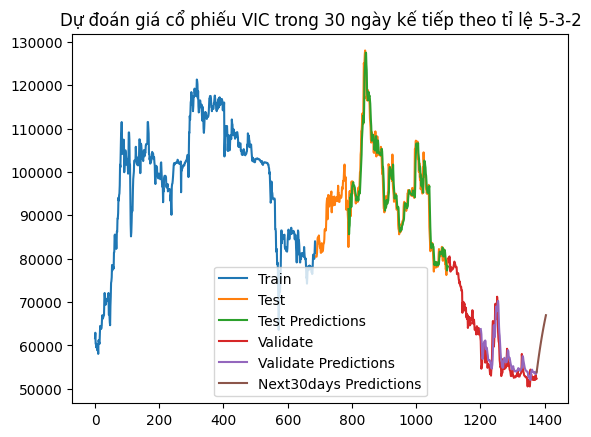

In [63]:
#Drawing plot
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(VIC1)-1, stop=len(VIC1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Test Predictions','Validate','Validate Predictions','Next30days Predictions'])
plt.title("Dự đoán giá cổ phiếu VIC trong 30 ngày kế tiếp theo tỉ lệ 5-3-2")
plt.show()